# HW 5, problem 1

Solving the gambler's problem in Sutton exercise 4.9.

In [1]:
using Plots

function value_iteration(V, pi)
    γ = 1    # discount factor (no discount in this problem)
    θ = 1e-30   # tolerance for convergence
    p_h = 0.4    # probability of getting head
    k = 0    # iteration/sweep
    while true
        δ = 0.0
        for s in 1:99    # loop through nonterminal states
            v = V[s+1]    # old value
            A = collect(1:min(s,100-s))
            q = zeros(length(A))
            for a in A
                # we don't need to loop over s' since there are only 
                # 2 possible states: s'=s+a (win) or s'=s-a (lose)
                q[a] = p_h*(0 + γ*V[s+a+1]) + (1-p_h)*(0 + γ*V[s-a+1])
            end
            V[s+1], greedy_action = findmax(q)
            pi[s+1] = greedy_action
            δ = max(δ, abs(v - V[s+1]))
        end
        k += 1
        if δ < θ
             break
        end
    end
    println(k, " sweeps.")
    return V, pi
end


pi = zeros(101)
V = zeros(101)
V[101] = 1
V, pi = value_iteration(V, pi)

33 sweeps.


([0.0, 0.0020656247765443165, 0.005164061941360791, 0.009225471067793893, 0.012910154853401976, 0.017385398981324286, 0.02306367766948473, 0.02781411305627054, 0.03227538713350494, 0.03768507279536644  …  0.8215490526259653, 0.8348748482737447, 0.8519785344739361, 0.8720731560690009, 0.8844821731748727, 0.9009249089642468, 0.9232438936414006, 0.9405549453785481, 0.9643329672271289, 1.0], [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0  …  9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0])

### Plotting the above value function and optimal policy

Both graphs match those in Figure 4.3 in the textbook. Because of indexing, x-value of 1 corresponds to having $0 in pocket, and every x-value is the true amount of money minus 1.

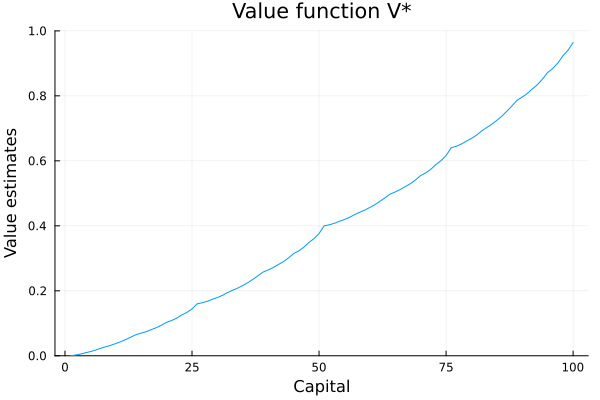

In [2]:
x = range(1, 100, length=100)
plot(x, V[1:100], ylims=(0,1), title="Value function V*", 
    xlabel="Capital", ylabel="Value estimates", legend=false)

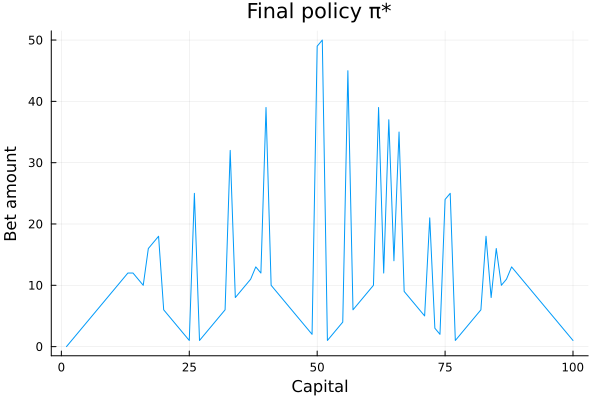

In [3]:
plot(x, pi[1:100], title="Final policy π*", 
    xlabel="Capital", ylabel="Bet amount", legend=false)

In [4]:
pi[50]

49.0

My output shows that $\pi_{*}(51)=49$, whereas in the textbook $\pi_{*}(51)=1$. Both policies are optimal because:

$V(51) = p_h * V(100) + (1-p_h) * V(2)$ (my policy) \
$V(51) = p_h * V(52) + (1-p_h) * V(50)$ (textbook's policy)

In [5]:
0.4 * V[100+1] + (1-0.4) * V[2+1]

0.40309843716481647

In [6]:
0.4 * V[52+1] + (1-0.4) * V[50+1]

0.4030984371648165

When the gambler's capital is 51 dollars, whether they bet 1 dollar or 49 dollars has the same "probability" of reaching 100 dollars, so both my policy and the textbook's policy are optimal.